# Project: FBI Gun Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
import warnings
warnings.filterwarnings("ignore")

<a id='intro'></a>
## Introduction

The data I selected is combined by two dataset. The first dataset is NICS data, which gives the information about number of firearms checks by month, state, and type. Another dataset, US Census data, contains various variables in state level. 

For this project, I have two different research questions:
 - What is the overall trend for firearm purchases over the years?
 - What is the most popular type of firearms among states for the last five years (2013- 2017)?
 - Which census data is most important to total number of gun checks? 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


## Gun Data

### Steps of data cleaning:
1. Checking the data information
2. Group data in two different ways, one in month, one in states

In [3]:
# Load gun data
gun_data = pd.read_excel('gun_data.xlsx')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [5]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [6]:
total_gun_data = gun_data[['month','state','totals']]
total_gun_data = total_gun_data.rename(columns = {'totals':'total_gun_checks'})
total_gun_data

,month,state,total_gun_checks
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506
...,...,...,...
12480,1998-11,Virginia,24
12481,1998-11,Washington,361
12482,1998-11,West Virginia,408
12483,1998-11,Wisconsin,241


In [7]:
# since the value information in this dataset is the totals for each state in different time period
# I will group them to understand more of the data
month_gun = total_gun_data.groupby('month').sum()
month_gun.head()

,total_gun_checks
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


In [8]:
state_gun = total_gun_data.groupby('state').sum()
state_gun.head()

,total_gun_checks
state,
Alabama,6706079
Alaska,1137643
Arizona,4425714
Arkansas,3752633
California,19014063


## Census Data

### Steps of data cleaning:
1. Drop uncessary column Fact Note
2. Check dataset information, and get all string type for numeric data
3. Swap the columns to use states as index 
4. Drop the uncessary column, FIPS Code column

In [9]:
# Load census data
census_data = pd.read_excel('census_data.xlsx')
census_data = census_data.drop(['Fact Note'], axis=1)
census_data

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [10]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            65 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [11]:
# Swap the columns to get a better understanding of the data
census_data = census_data.T
census_data.columns = census_data.iloc[0]
census_data = census_data[1:]
# drop the FIPS Code column which will not be useful for this project
census_data = census_data.drop(['FIPS Code'], axis=1)
census_data.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


### Data Cleaning and Merging Two Datasets

### Steps of data cleaning:
1. Convert all numberic data from string to numberic format
2. Check the number of records before merging
3. Remove unmatching data, 5 records
4. Join two dataframes on state's name to get the cleaned datframe for further analysis

In [12]:
# based on the observation of the dataset, we need to convert the number either to integer or float. To do that, 
# we need to remove any unneccessary sign like "$" and "%" from the number
import re 

def keep_number(s):
    s = re.sub(r'[^0-9\.]+', '',s)
    return s

In [13]:
for i in census_data.columns:
    census_data[i] = census_data[i].astype(str).apply(keep_number)

In [14]:
# check if all the sigh have been removed
census_data.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300,4780131,1.70,4779736,6.00,6.40,22.60,23.70,16.10,13.80,...,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
Alaska,741894,710249,4.50,710231,7.30,7.60,25.20,26.40,10.40,7.70,...,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95
Arizona,6931071,6392301,8.40,6392017,6.30,7.10,23.50,25.50,16.90,13.80,...,451951,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08
Arkansas,2988248,2916025,2.50,2915918,6.40,6.80,23.60,24.40,16.30,14.40,...,198380,231959,123158,75962,35982,189029,25915,192988,56,52035.48
California,39250017,37254522,5.40,37253956,6.30,6.80,23.20,25.00,13.60,11.40,...,3206958,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22


In [15]:
# convert string format number to numeric format
for i in census_data.columns:
    census_data[i] = pd.to_numeric(census_data[i])

In [16]:
census_data.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
count,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,3.18470,6.162876e+06,4.696780,5.021400,17.425780,18.338000,11.81044,9.989360,...,4.855009e+05,5.548918e+05,2.976230e+05,1.971777e+05,1.585531e+05,3.806367e+05,50502.72000,4.817082e+05,194.962000,70636.887800
std,7.271769e+06,6.848463e+06,3.30514,6.848235e+06,2.697349,2.902275,9.936137,10.431304,6.84738,5.814701,...,6.076460e+05,6.645229e+05,3.540115e+05,2.482425e+05,3.017390e+05,3.618627e+05,52073.87529,5.921109e+05,261.091465,85815.678218
min,5.855010e+05,5.637670e+05,0.00300,5.636260e+05,0.052000,0.055000,0.197000,0.213000,0.14500,0.129000,...,4.814000e+04,6.242700e+04,3.003900e+04,1.934400e+04,2.354000e+03,3.851000e+04,6470.00000,5.135300e+04,1.200000,1033.810000
25%,1.850106e+06,1.833003e+06,0.14525,1.833004e+06,4.825000,5.125000,19.025000,20.700000,10.42500,8.025000,...,1.215145e+05,1.478222e+05,7.734775e+04,4.682475e+04,1.471450e+04,1.310602e+05,15796.50000,1.254088e+05,44.450000,36741.167500
50%,4.559320e+06,4.436412e+06,2.05000,4.436370e+06,6.000000,6.350000,22.250000,23.500000,15.00000,12.450000,...,3.014300e+05,3.535155e+05,1.951455e+05,1.274355e+05,6.306350e+04,2.769725e+05,38051.50000,2.959635e+05,98.750000,53891.280000
75%,7.198768e+06,6.680362e+06,5.07500,6.680312e+06,6.400000,6.800000,23.450000,24.550000,16.10000,13.800000,...,5.096492e+05,5.933612e+05,3.403212e+05,2.066418e+05,1.301590e+05,4.481730e+05,58253.25000,5.116312e+05,209.500000,81225.725000
max,3.925002e+07,3.725452e+07,10.80000,3.725396e+07,8.300000,9.500000,30.200000,31.500000,19.90000,17.300000,...,3.206958e+06,3.548449e+06,1.852580e+06,1.320085e+06,1.619857e+06,1.819107e+06,252377.00000,3.176341e+06,1195.500000,570640.950000


In [17]:
# before merging those two datasets, we need to make sure the indexes numbers are the same
len(state_gun.index),len(census_data.index)

(55, 50)

In [18]:
# there is 5 difference in between, we need to find out what are those
# those five areas will be ignored for futher analysis through inner join of two datasets
for i in state_gun.index:
    if i not in census_data.index:
        print(i)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [19]:
# merging two datasets based on state name
merged_data = state_gun.join(census_data, how='inner')
merged_data.head()

,total_gun_checks,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,6706079,4863300,4780131,1.7,4779736,6.0,6.4,22.6,23.7,16.1,...,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
Alaska,1137643,741894,710249,4.5,710231,7.3,7.6,25.2,26.4,10.4,...,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95
Arizona,4425714,6931071,6392301,8.4,6392017,6.3,7.1,23.5,25.5,16.9,...,451951,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08
Arkansas,3752633,2988248,2916025,2.5,2915918,6.4,6.8,23.6,24.4,16.3,...,198380,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48
California,19014063,39250017,37254522,5.4,37253956,6.3,6.8,23.2,25.0,13.6,...,3206958,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What is the overall trend for firearm purchases over the years?

In [20]:
total_gun_data['year'] = total_gun_data.month.astype(str).str[:4]

In [21]:
total_gun_data

,month,state,total_gun_checks,year
0,2017-09,Alabama,32019,2017
1,2017-09,Alaska,6303,2017
2,2017-09,Arizona,28394,2017
3,2017-09,Arkansas,17747,2017
4,2017-09,California,123506,2017
...,...,...,...,...
12480,1998-11,Virginia,24,1998
12481,1998-11,Washington,361,1998
12482,1998-11,West Virginia,408,1998
12483,1998-11,Wisconsin,241,1998


In [22]:
year_data = total_gun_data.groupby('year').sum().reset_index()

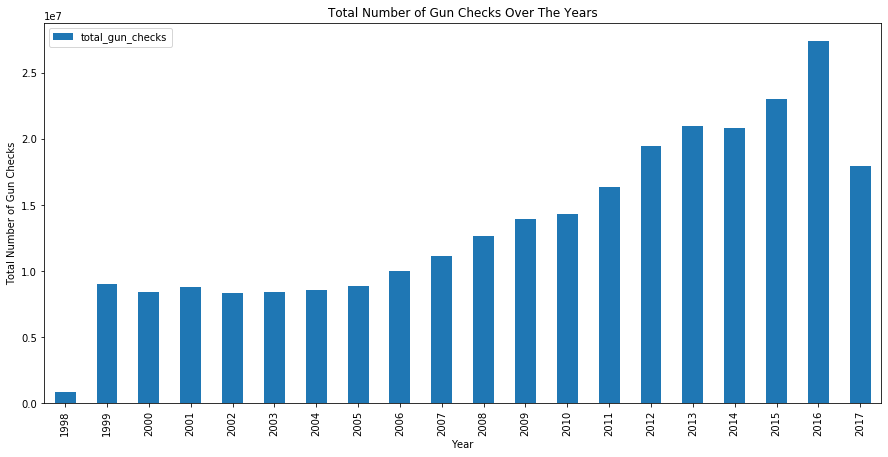

In [23]:
# Create the bar chart
ax = year_data.plot.bar(x='year',y='total_gun_checks',figsize=(15,7))
ax.set_ylabel('Total Number of Gun Checks')
ax.set_title('Total Number of Gun Checks Over The Years')
ax.set_xlabel('Year')
ax.legend()

In general, the number of purchases of firearms over the years shows an increasing trend with two peak data points in 1999 and 2016 and one huge drop in 2017

### Research Question 2  - What is the most popular type of firearms among states for the last five years (2013- 2017)?

In [24]:
gun_data = gun_data.drop(['returned_handgun','returned_long_gun', 'returned_other','state','return_to_seller_handgun', 'return_to_seller_long_gun','return_to_seller_other'], axis=1)

In [25]:
gun_data['year'] = gun_data.month.astype(str).str[:4]
gun_data = gun_data.drop('month',axis=1)
gun_data.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,totals,year
0,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,9.0,16.0,3.0,32019,2017
1,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,0.0,0.0,17.0,24.0,1.0,6303,2017
2,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,0.0,0.0,38.0,12.0,2.0,28394,2017
3,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,13.0,23.0,0.0,17747,2017
4,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,123506,2017


In [26]:
last_five_year = gun_data.loc[gun_data.year.isin(['2013','2014','2015','2016','2017'])]

In [27]:
firearm_type = last_five_year.groupby('year')['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple',
       'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other',
       'redemption_handgun', 'redemption_long_gun', 'redemption_other',
       'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other'].sum().reset_index()

In [28]:
firearm_type

,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other
0,2013,6169832.0,0.0,6387502.0,7128798.0,212776.0,241360,5664.0,2500.0,3418.0,89.0,359478.0,453518.0,878.0,5.0,1.0,385.0,409.0,68.0
1,2014,7769858.0,0.0,6199243.0,5543371.0,268263.0,225475,4258.0,2225.0,2822.0,146.0,386936.0,452908.0,1380.0,3.0,0.0,1720.0,1341.0,103.0
2,2015,8782048.0,0.0,7333808.0,5479441.0,329499.0,242375,7037.0,2362.0,2531.0,175.0,395152.0,415076.0,1512.0,0.0,0.0,7181.0,5804.0,472.0
3,2016,11134651.0,519265.0,8085498.0,5988511.0,586137.0,257723,3366.0,2623.0,2567.0,161.0,402461.0,381004.0,2399.0,16.0,21.0,14561.0,11042.0,1038.0
4,2017,7469845.0,763287.0,5242703.0,3421362.0,276990.0,169389,4488.0,2167.0,1894.0,193.0,314818.0,259347.0,1555.0,52.0,50.0,17227.0,13312.0,1152.0


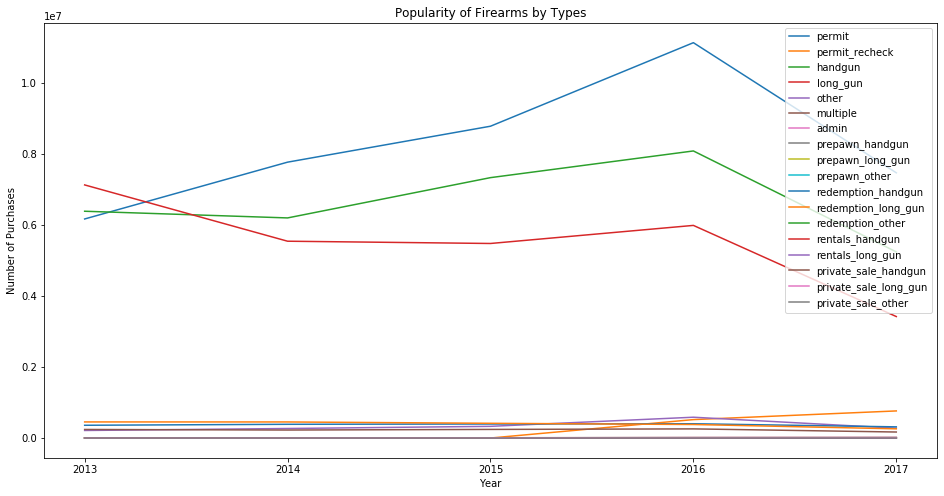

In [29]:
# Create the multiple line chart
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Popularity of Firearms by Types')
plt.ylabel('Number of Purchases')
plt.xlabel('Year')
ax.plot('year', 'permit', data=firearm_type, label="permit")
ax.plot('year', 'permit_recheck', data=firearm_type, label="permit_recheck")
ax.plot('year', 'handgun', data=firearm_type, label="handgun")
ax.plot('year', 'long_gun', data=firearm_type, label="long_gun")
ax.plot('year', 'other', data=firearm_type, label="other")
ax.plot('year', 'multiple', data=firearm_type, label="multiple")
ax.plot('year', 'admin', data=firearm_type, label="admin")
ax.plot('year', 'prepawn_handgun', data=firearm_type, label="prepawn_handgun")
ax.plot('year', 'prepawn_long_gun', data=firearm_type, label="prepawn_long_gun")
ax.plot('year', 'prepawn_other', data=firearm_type, label="prepawn_other")
ax.plot('year', 'redemption_handgun', data=firearm_type, label="redemption_handgun")
ax.plot('year', 'redemption_long_gun', data=firearm_type, label="redemption_long_gun")
ax.plot('year', 'redemption_other', data=firearm_type, label="redemption_other")
ax.plot('year', 'rentals_handgun', data=firearm_type, label="rentals_handgun")
ax.plot('year', 'rentals_long_gun', data=firearm_type, label="rentals_long_gun")
ax.plot('year', 'private_sale_handgun', data=firearm_type, label="private_sale_handgun")
ax.plot('year', 'private_sale_long_gun', data=firearm_type, label="private_sale_long_gun")
ax.plot('year', 'private_sale_other', data=firearm_type, label="private_sale_other")
ax.legend(loc='upper right');

Based on the above chart, it shows that the most favored firearm type in United States in the last five years (2013-2017) is permit with a peak in 2016. Comparing to other types, generally permit, handgun and long gun weigh more than any other types. 

### Research Question 3  - Which census data is most important to total number of gun checks in terms of the correlations? 

In [30]:
# Calculate the correlations between the total_gun_checks and different census data
merged_data.head()

,total_gun_checks,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,6706079,4863300,4780131,1.7,4779736,6.0,6.4,22.6,23.7,16.1,...,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
Alaska,1137643,741894,710249,4.5,710231,7.3,7.6,25.2,26.4,10.4,...,55521,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95
Arizona,4425714,6931071,6392301,8.4,6392017,6.3,7.1,23.5,25.5,16.9,...,451951,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08
Arkansas,3752633,2988248,2916025,2.5,2915918,6.4,6.8,23.6,24.4,16.3,...,198380,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48
California,19014063,39250017,37254522,5.4,37253956,6.3,6.8,23.2,25.0,13.6,...,3206958,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22


In [31]:
# Create a separate dataframe for correlations
correlation = merged_data.corr().iloc[:, 0].to_frame()[1:]
correlation = correlation.rename(columns={'total_gun_checks': 'Correlations'})
correlation                           

,Correlations
"Population estimates, July 1, 2016, (V2016)",0.649697
"Population estimates base, April 1, 2010, (V2016)",0.649583
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.123185
"Population, Census, April 1, 2010",0.649580
"Persons under 5 years, percent, July 1, 2016, (V2016)",0.078125
...,...
"Nonminority-owned firms, 2012",0.646606
"Veteran-owned firms, 2012",0.650293
"Nonveteran-owned firms, 2012",0.611154
"Population per square mile, 2010",-0.073982


In [32]:
# Find out positive and negative correlations
positive_corr = correlation[correlation.Correlations >0]
positive_corr.sort_values(by=['Correlations'], inplace=True, ascending=False)
print('Top 10 positive correlations')
positive_corr.head(10)

Top 10 positive correlations


,Correlations
"Total manufacturers shipments, 2012 ($1,000)",0.684760
"Veterans, 2011-2015",0.673238
"Households, 2011-2015",0.657333
"Housing units, July 1, 2016, (V2016)",0.657252
"Housing units, April 1, 2010",0.655460
"Veteran-owned firms, 2012",0.650293
"Population estimates, July 1, 2016, (V2016)",0.649697
"Population estimates base, April 1, 2010, (V2016)",0.649583
"Population, Census, April 1, 2010",0.649580
"Nonminority-owned firms, 2012",0.646606


In [33]:
negative_corr = correlation[correlation.Correlations <0]
negative_corr.sort_values(by=['Correlations'], inplace=True)
print('Top 10 negative correlations')
negative_corr.head(10)

Top 10 negative correlations


,Correlations
"Total retail sales per capita, 2012",-0.293659
"Median household income (in 2015 dollars), 2011-2015",-0.214555
"Per capita income in past 12 months (in 2015 dollars), 2011-2015",-0.190280
"Median selected monthly owner costs -without a mortgage, 2011-2015",-0.174294
"Median value of owner-occupied housing units, 2011-2015",-0.154707
"Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",-0.147103
"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)",-0.137100
"Two or More Races, percent, July 1, 2016, (V2016)",-0.123621
"Median selected monthly owner costs -with a mortgage, 2011-2015",-0.098762
"Population per square mile, 2010",-0.073982


<a id='conclusions'></a>
## Conclusions

With the statistical analysis conducted above, we can answer the research questions on the top of this notebook:

   1. What is the overall trend for firearm purchases over the years?
      - Total putchased firearms trand is showing a increasing trend with the peaks in 1999 and 2016 and a huge drop in 2017.
      
   2. What is the most popular type of firearms among states for the last five years (2013- 2017)?
      - The most popular type of firearm is permit cross States, and it has the most number of purchases except year 2013.
      
   3. Which census data is most important to total number of gun checks in terms of the correlations? 
      - The top three associated census data are: Total manufacturers shipments (0.684760), Veterans(0.673238), and Number of Households(0.657333).

## Limitations

Some of the data in the census dataset are inconsistent in terms of different time periods, but we need to work on what data we have sometimes, so we need to be skeptical about the correlation conclusion to some extent. Also, the correlation implys certain degreee of relationship, but doesn't imply causation. There could be many other reasons related to the firearm sales, we will need more different aspects of data to further explore. 